In [1]:
import pandas as pd
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

In [2]:
import numpy as np
train = np.asarray(train)
test = np.asarray(test)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


In [3]:
import matplotlib.pyplot as plt
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
x_train = train[:, 1:785]
y_train = train[:, 0]
y_train = np_utils.to_categorical(y_train)
print(x_train.shape, y_train.shape)

(65000, 784) (65000, 27)


In [6]:
x_test = test[:, 1:785]
y_test = test[:, 0]
y_test = np_utils.to_categorical(y_test)
print(x_test.shape, y_test.shape)

(13000, 784) (13000, 27)


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [8]:
N, M = x_train.shape #к-во объектов и признаков в обуч выборке
O = 1024 
P = 512
K = 64
T = 27
batch_size = 200
learning_rate = 0.001 
training_epochs = 10

In [9]:
tf.reset_default_graph()
model = Sequential()
model.add(Dense(O, input_dim = 784, batch_size = batch_size, activation = 'relu'))
model.add(Dense(P, activation='sigmoid'))
#model.add(Dense(K, activation='relu'))
model.add(Dense(T, activation = 'softmax'))
model.compile(optimizer = 'nadam', loss='categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs = training_epochs, batch_size = batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (200, 1024)               803840    
_________________________________________________________________
dense_2 (Dense)              (200, 512)                524800    
_________________________________________________________________
dense_3 (Dense)              (200, 27)                 13851     
Total params: 1,342,491
Trainable params: 1,342,491
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
65000/65000 [==============================] - 26s 404us/step - loss: 0.7726 - acc: 0.7661
Epoch 2/10
65000/65000 [==============================] - 25s 382us/step - loss: 0.3430 - acc: 0.8890
Epoch 3/10
65000/65000 [==============================] - 25s 383us/step - loss: 0.2501 - acc: 0.9155
Epoch 4/10
65000/65000 [==============================] - 25s 381us/step - loss: 0.19

<br/> sigmoid hard_sigmoid softmax RMSprop 93
<br/> relu sigmoid softmax nadam 97 90.4(test)

In [15]:
score = model.evaluate(x_test, y_test, batch_size = batch_size)
print(score)

13000/13000 [==============================] - 1s 96us/step
[0.32996543783407944, 0.9048461483075069]


10


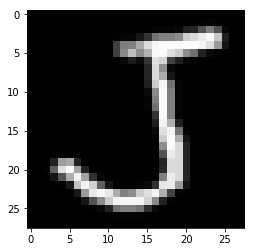

array([10], dtype=int64)

In [12]:
i = 90
first_pic = x_test[i]
pic_label, pic = test[i,0], first_pic
print(pic_label)
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()
model.predict_classes(x_test[i:i+1])

In [17]:
indexes = []
print(x_test.shape[0])
for i in range (0, x_test.shape[0]):
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    #print(pic_label)
    if pic_label != model.predict_classes(x_test[i:i+1]):
        indexes.append(i)
        
print(len(indexes))

13000
1237


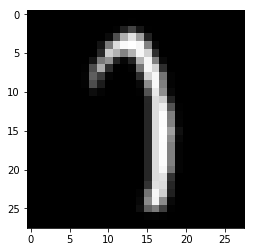

10 17
j q


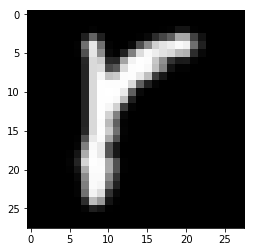

18 25
r y


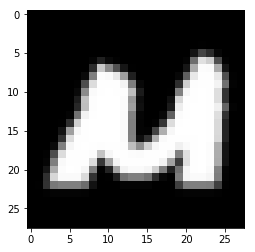

13 14
m n


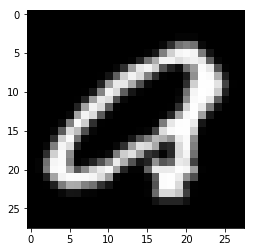

17 1
q a


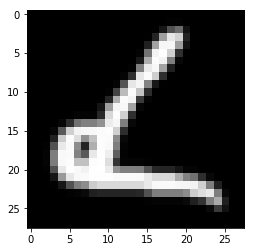

4 12
d l


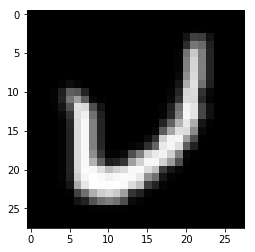

22 21
v u


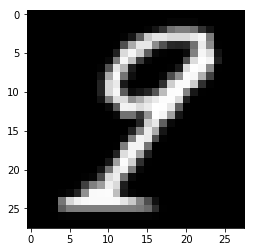

17 25
q y


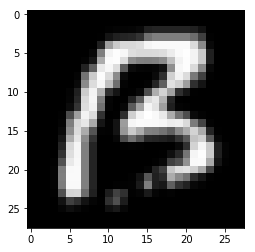

2 18
b r


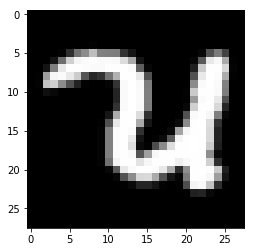

21 22
u v


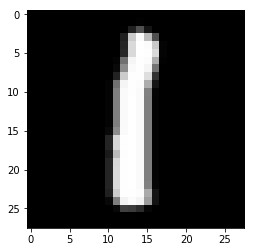

12 9
l i


In [18]:
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s', 't','u','v','w','x','y','z']
for i in indexes[20:30]:
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
    plt.show()
    print(test[i, 0], model.predict_classes(x_test[i:i+1])[0])
    print(characters[test[i, 0]-1], characters[model.predict_classes(x_test[i:i+1])[0]-1])
#print(characters[test[indexes[1:10],0]], characters[for i in model.predict_classes(x_test[indexes[1:10]])])

In [59]:
errors = pd.DataFrame(index = characters, columns = characters)
errors = errors.fillna(0)

for i in indexes:
    errors[characters[test[i, 0]-1] ][characters[model.predict_classes(x_test[i:i+1])[0]-1]] += 1
    
#for j in range(errors.shape[0]):
#    for i in range(j, errors.shape[1]):
#        errors[characters[i]][characters[j]] += errors[characters[j]][characters[i]]
#        errors[characters[j]][characters[i]] = 0
        
print(errors)
errors.to_csv('df.csv', sep=';')

   a  b   c   d  e  f   g  h   i   j ...    q  r   s   t   u  v   w  x   y  z
a  0  2   2   3  0  1  10  4   0   1 ...   19  9   0   0   2  0   2  1   1  2
b  3  0   1   1  0  0   4  1   1   1 ...    2  0   1   1   0  0   0  0   1  1
c  0  0   0   0  7  0   0  0   0   0 ...    1  3   0   3   0  0   0  0   0  0
d  3  3   0   0  0  0   1  0   0   8 ...    2  0   0   0   1  0   1  0   0  1
e  3  1  14   0  0  1   1  0   1   0 ...    0  2   0   1   0  0   0  0   0  2
f  1  2   1   0  2  0   2  1   3   0 ...    4  5   0  11   0  1   0  0   1  1
g  5  9   3   0  3  2   0  0   0   3 ...  115  0  15   0   0  0   0  2   4  3
h  2  7   0   0  0  0   0  0   0   1 ...    0  1   0   1   2  0   0  1   1  0
i  0  2   0   1  1  0   0  0   0   8 ...    2  0   0   2   0  0   0  0   1  1
j  0  1   0   6  0  1   3  0  19   0 ...    0  0   4   3   1  1   0  0   3  0
k  0  0   0   0  0  0   0  2   0   0 ...    0  2   0   2   0  0   1  3   0  0
l  0  0   6   2  0  1   0  7  54   0 ...    0  0   0   2   0  0 

In [56]:
num_count = pd.DataFrame(index = characters, columns = [1])
num_count = num_count.fillna(0)

for i in range (0, x_test.shape[0]):
    pic_label= test[i,0]
    num_count[1][characters[pic_label-1]] += 1
print(num_count)

     1
a  500
b  500
c  500
d  500
e  500
f  500
g  500
h  500
i  500
j  500
k  500
l  500
m  500
n  500
o  500
p  500
q  500
r  500
s  500
t  500
u  500
v  500
w  500
x  500
y  500
z  500


In [70]:
errors_percent = pd.DataFrame(index = characters, columns = [1], dtype = np.float)
errors_percent = errors_percent.fillna(0)

for i in characters:
    sum_error = 0
    for j in characters:
        sum_error += errors[i][j]
    errors_percent[1][i] = sum_error / 500.
print(errors_percent)

       1
a  0.082
b  0.074
c  0.072
d  0.068
e  0.036
f  0.050
g  0.140
h  0.056
i  0.172
j  0.096
k  0.092
l  0.408
m  0.044
n  0.068
o  0.044
p  0.086
q  0.324
r  0.080
s  0.048
t  0.078
u  0.072
v  0.060
w  0.044
x  0.048
y  0.086
z  0.046
